<a href="https://colab.research.google.com/github/abhisekmiitk/ensemble_new/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import zipfile
import pandas as pd

# Unzip the file
with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the CSV
df = pd.read_csv("ecom_data.csv")
df.replace
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## EDA Analysis

Shape: (5630, 20)

Columns:
 Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Missing Values:
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmo

<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

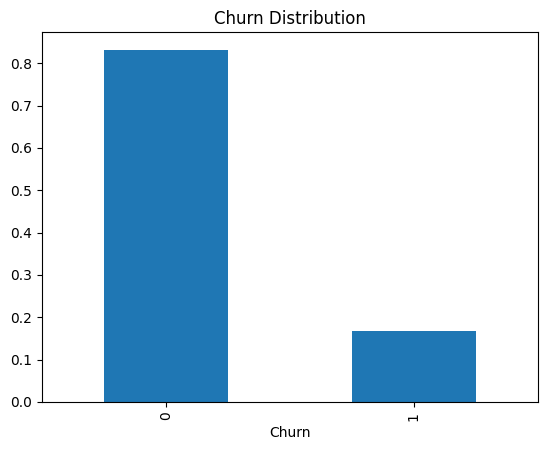

In [76]:
# Shape & columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Null values
print("\nMissing Values:\n", df.isnull().sum())

# Data types
print("\nData Types:\n", df.dtypes)

# Target distribution
df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')


## Removing Missing value

In [77]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Separate feature types as median value will be used to impute missing value for numerical column
# Most frequent value is used to fill categorical value

num_cols = [
    "Tenure", "WarehouseToHome", "HourSpendOnApp",
    "OrderAmountHikeFromlastYear", "OrderCount", "DaySinceLastOrder"
]
cat_cols = [
    "PreferredLoginDevice", "PreferredPaymentMode", "Gender",
    "CityTier", "PreferedOrderCat", "MaritalStatus",
    "NumberOfDeviceRegistered", "NumberOfAddress", "Complain", "CouponUsed"
]


df[num_cols] = (
    pd.DataFrame(
        SimpleImputer(strategy="median")
        .fit_transform(df[num_cols]),
        columns=num_cols,
        index=df.index
    )
)


df[cat_cols] = (
    pd.DataFrame(
        SimpleImputer(strategy="most_frequent")
        .fit_transform(df[cat_cols]),
        columns=cat_cols,
        index=df.index
    )
)


# cross check missing values

print(df.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [78]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,NaN,NaN,NaN,52815.5,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5630.0,NaN,NaN,NaN,10.134103,8.357951,0.0,3.0,9.0,15.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,3.0,1.0,3666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WarehouseToHome,5630.0,NaN,NaN,NaN,15.566785,8.345961,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5630.0,NaN,NaN,NaN,2.934636,0.705528,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,6.0,4.0,2377.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


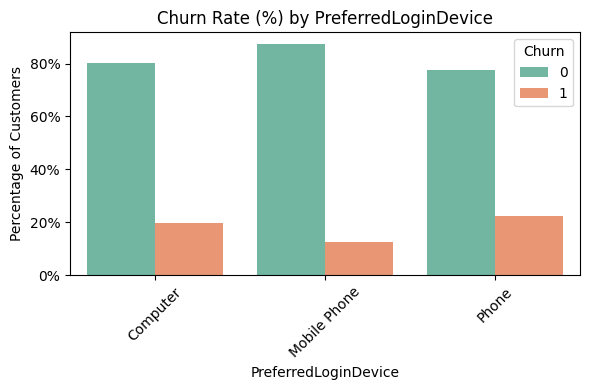

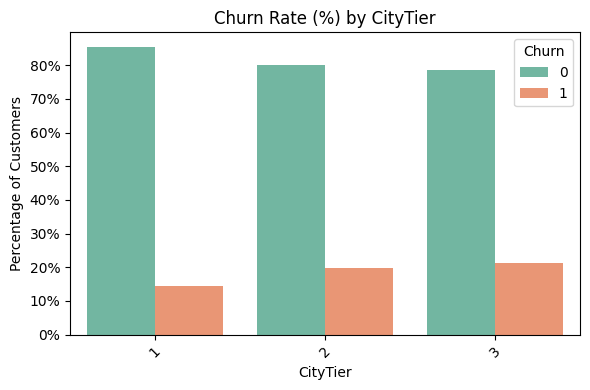

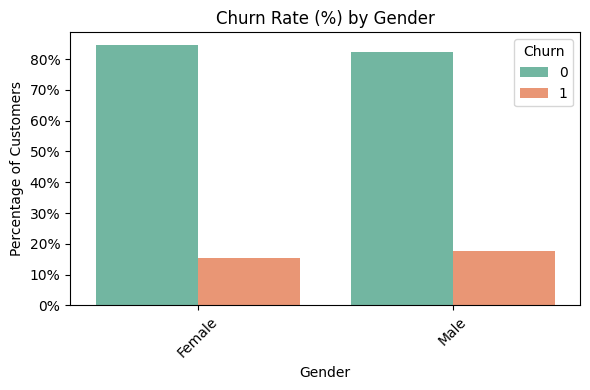

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Categorical features to inspect
categorical_cols = ['PreferredLoginDevice', 'CityTier', 'Gender']

for col in categorical_cols:
    # ── 1. Build a % DataFrame ───────────────────────────────────────────
    pct_df = (
        df.groupby(col)['Churn']
          .value_counts(normalize=True)          # proportions (0–1)
          .rename('Percentage')
          .reset_index()
    )

    # ── 2. Plot ──────────────────────────────────────────────────────────
    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=pct_df,
        x=col,
        y='Percentage',
        hue='Churn',
        palette='Set2'
    )
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.title(f'Churn Rate (%) by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


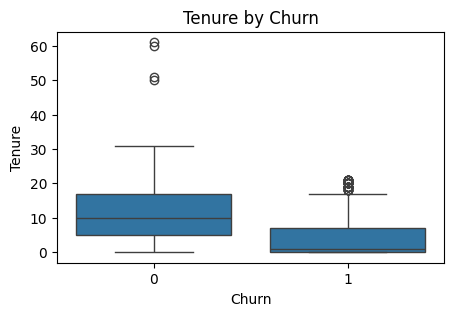

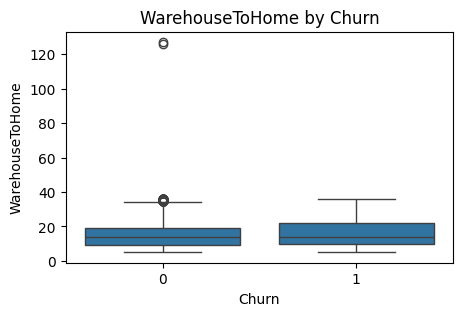

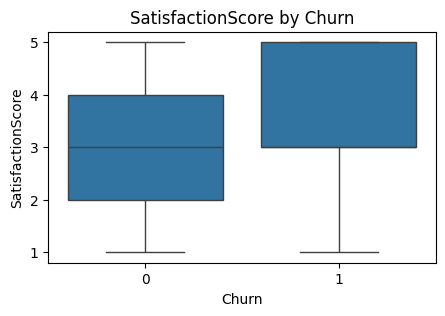

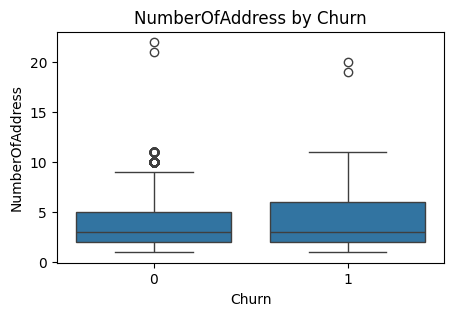

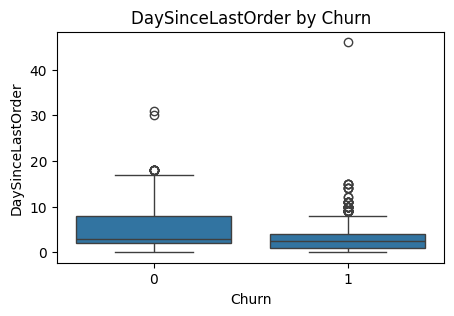

In [81]:
# Churn vs numeric features
numerical_cols = ['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder']
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} by Churn')
    plt.show()


## Modelling

In [82]:
!pip install -q xgboost catboost lightgbm scikit-learn pandas numpy

In [83]:

# Imports & dataset already loaded into df, X, y as before

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


# Features / target
X = df.drop('Churn', axis=1)
y = df['Churn']



cat_cols = ['PreferredLoginDevice',
  'CityTier',
  'PreferredPaymentMode',
  'Gender',
  'NumberOfDeviceRegistered',
  'PreferedOrderCat',
  'MaritalStatus',
  'NumberOfAddress',
  'Complain',
  'CouponUsed']
num_cols = [
  'Tenure',
  'WarehouseToHome',
  'HourSpendOnApp',
  'SatisfactionScore',
  'OrderAmountHikeFromlastYear',
  'OrderCount',
  'DaySinceLastOrder',
  'CashbackAmount']



In [84]:
# X,y,cat_cols,num_cols

In [85]:

# 2️⃣  Train-test split ----------------------------------------------------
from sklearn.model_selection import train_test_split
X.drop('CustomerID',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [86]:
X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [53]:
# print(X_train.map(str)), print(X_test.map(str)), print(y_train.map(str)), print(y_test.map(str))

In [87]:

# Helper for metrics
results = {}
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
def evaluate(name, y_true, y_pred):


    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)

    # Store in global results dictionary
    results[name] = {
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        'f1_score': round(f1, 3)
    }

    # Print metrics
    print(f"{name:<15} | Accuracy: {acc:.3f}  Precision: {prec:.3f}  Recall: {rec:.3f}  f1_score: {f1:.3f}")



### AdaBoost Algorithm

In [88]:

ada = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", AdaBoostClassifier(
        n_estimators=2000, learning_rate=0.05, random_state=42))])
ada.fit(X_train, y_train)
evaluate("AdaBoost", y_test, ada.predict(X_test))


AdaBoost        | Accuracy: 0.871  Precision: 0.707  Recall: 0.397  f1_score: 0.508


### Gradient Boosting Algorithm

In [89]:

gb = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42))
])
gb.fit(X_train, y_train)
evaluate("GradientBoosting", y_test, gb.predict(X_test))


GradientBoosting | Accuracy: 0.920  Precision: 0.816  Recall: 0.675  f1_score: 0.739


## XgBoost Algorithm

In [72]:
xgb = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", XGBClassifier(
        n_estimators=400, max_depth=4, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        objective="binary:logistic", eval_metric="logloss",
        random_state=42))
])
xgb.fit(X_train, y_train)
evaluate("XGBoost", y_test,
         (xgb.predict_proba(X_test)[:, 1] > 0.5).astype(int))


XGBoost         | Accuracy: 0.933  Precision: 0.851  Recall: 0.726  f1_score: 0.784


### CatBoost Algorithm

In [90]:

for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

cat_model = CatBoostClassifier(
    iterations=400, depth=6, learning_rate=0.05,
    loss_function="Logloss", eval_metric="AUC",
    verbose=False, random_state=42
)
cat_model.fit(X_train, y_train,
              cat_features=[X.columns.get_loc(c) for c in cat_cols])
evaluate("CatBoost", y_test, cat_model.predict(X_test))


CatBoost        | Accuracy: 0.940  Precision: 0.888  Recall: 0.734  f1_score: 0.804


### LightGBM

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier
import pandas as pd

# Pipeline
lgbm = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", LGBMClassifier(
        n_estimators=400, max_depth=-1, learning_rate=0.05,
        num_leaves=31, subsample=0.8, colsample_bytree=0.8,
        random_state=42))
])

# Train
lgbm.fit(X_train, y_train)

# Evaluate
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]
evaluate("LightGBM", y_test, (y_prob > 0.5).astype(int))

# Use X_test index to safely grab raw feature rows from original df
X_test_original = df.loc[X_test.index].drop(columns=['Churn', 'CustomerID'], errors='ignore')

results_df = X_test_original.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 711, number of negative: 3511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 4222, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168404 -> initscore=-1.596984
[LightGBM] [Info] Start training from score -1.596984
LightGBM        | Accuracy: 0.982  Precision: 0.961  Recall: 0.932  f1_score: 0.946


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Accuracy, Precision and Recall

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# transpose to get models as rows
df_results = pd.DataFrame(results).T



### Accuracy, Precision & Recall


**Accuracy**
The proportion of total predictions that were correct.

$$
\text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{Total Predictions}}
$$

**Precision**
Of all the customers the model predicted would churn, how many actually did?

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

**Recall** (a.k.a. Sensitivity or True Positive Rate)
Of all actual churners, how many did the model correctly identify?

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$



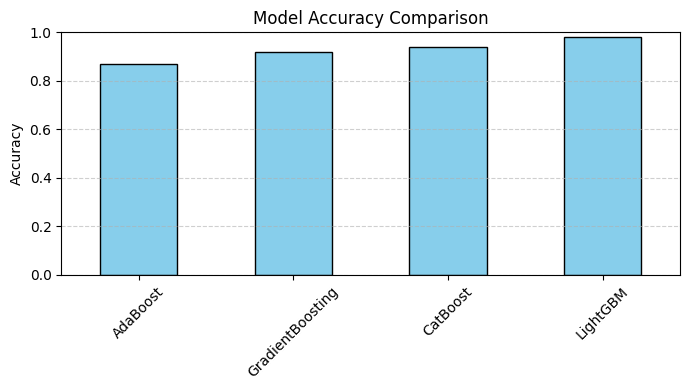

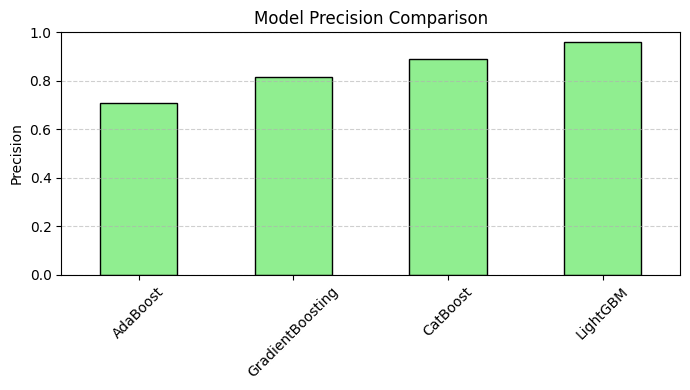

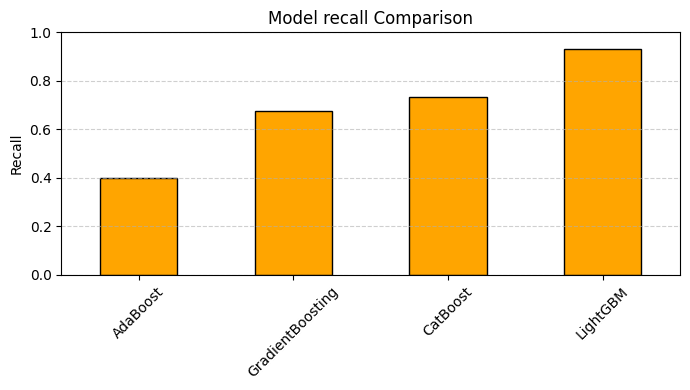

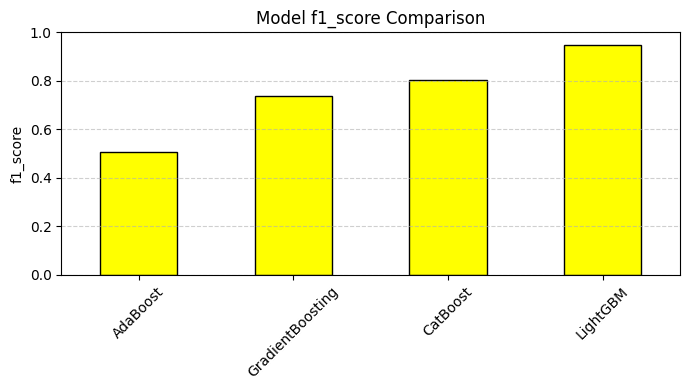

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot Accuracy
plt.figure(figsize=(7, 4))
df_results["Accuracy"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Precision
plt.figure(figsize=(7, 4))
df_results["Precision"].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Plot recall
plt.figure(figsize=(7, 4))
df_results["Recall"].plot(kind='bar', color='orange', edgecolor='black')
plt.title("Model recall Comparison")
plt.ylabel("Recall")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot F1
plt.figure(figsize=(7, 4))
df_results["f1_score"].plot(kind='bar', color='yellow', edgecolor='black')
plt.title("Model f1_score Comparison")
plt.ylabel("f1_score")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Output sample of LightGBM Algorithm

In [64]:

results_df.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Actual,Predicted
5106,4.0,Mobile Phone,3,32.0,E wallet,Male,3.0,5,Fashion,4,Single,4,1,13.0,2.0,2.0,3.0,216,1,1
2629,12.0,Mobile Phone,1,16.0,Credit Card,Male,3.0,3,Fashion,3,Single,8,0,21.0,2.0,2.0,2.0,235,0,0
1093,14.0,Mobile Phone,3,12.0,E wallet,Male,2.0,3,Fashion,3,Single,2,0,12.0,6.0,8.0,7.0,192,0,0
217,4.0,Mobile Phone,1,13.0,Credit Card,Female,2.0,3,Fashion,2,Single,2,1,14.0,2.0,4.0,10.0,171,0,0
635,26.0,Computer,3,8.0,E wallet,Female,2.0,4,Fashion,4,Divorced,3,0,12.0,0.0,6.0,12.0,175,0,0
3146,1.0,Mobile Phone,3,14.0,Debit Card,Male,3.0,5,Fashion,2,Married,11,0,22.0,2.0,2.0,2.0,241,0,0
402,5.0,Mobile Phone,3,16.0,E wallet,Male,2.0,3,Laptop & Accessory,2,Single,2,0,12.0,0.0,1.0,8.0,154,0,0
3599,1.0,Mobile Phone,1,32.0,Debit Card,Female,3.0,2,Mobile Phone,2,Single,3,1,13.0,2.0,2.0,2.0,155,0,0
2238,2.0,Phone,1,7.0,Debit Card,Female,3.0,3,Mobile Phone,1,Married,2,0,15.0,1.0,1.0,2.0,138,0,0
501,5.0,Mobile Phone,1,14.0,Credit Card,Female,3.0,1,Laptop & Accessory,3,Divorced,6,0,12.0,1.0,1.0,3.0,152,0,0
